In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, QiskitError
#from qiskit import execute, BasicAer
import qiskit.ignis.verification.randomized_benchmarking as rb
#import qiskit.test.benchmarks.randomized_benchmarking as br
import pyzx
from pyzx.circuit.qasmparser import QASMParser
from pyzx.circuit.qiskitqasmparser import QiskitQASMParser

In [2]:
#qc = rb.randomized_benchmarking_seq()
qc = rb.randomized_benchmarking_seq(nseeds=1, length_vector=None,
                                rb_pattern=[[0,1]],
                                length_multiplier=1, seed_offset=0,
                                align_cliffs=False,
                                interleaved_gates=None,
                                is_purity=False)
qc = qc[0][0][0]

In [3]:
# setting up the backend
# print(BasicAer.backends())

# running the job
# job_sim = execute(qc, BasicAer.get_backend('qasm_simulator'))
# sim_result = job_sim.result()

In [4]:
# print("\nPrint all gates:")
# [print(dat) for dat in qc.data]

In [5]:
qasm = qc.decompose().qasm()
### if you want to remove all barriers
## qasm = '\n'.join(['' if line.startswith("barrier") else line for line in qasm.splitlines()])

qc = qc.from_qasm_str(qasm)

print("\nPrint QASM:")
print(qasm)


Print QASM:
OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];
u1(-pi/2) qr[0];
u2(0,pi) qr[0];
u2(0,pi) qr[1];
u1(-pi/2) qr[1];
u2(0,pi) qr[1];
cx qr[0],qr[1];
u2(0,pi) qr[0];
u1(pi/2) qr[0];
u3(pi,pi/2,pi/2) qr[0];
u2(0,pi) qr[1];
u1(pi/2) qr[1];
u3(pi,pi/2,pi/2) qr[1];
barrier qr[0],qr[1];
u3(pi,pi/2,pi/2) qr[0];
u1(-pi/2) qr[0];
u2(0,pi) qr[0];
u3(pi,pi/2,pi/2) qr[1];
u1(-pi/2) qr[1];
u2(0,pi) qr[1];
cx qr[0],qr[1];
u2(0,pi) qr[0];
u1(pi/2) qr[0];
u2(0,pi) qr[1];
u1(pi/2) qr[1];
u2(0,pi) qr[1];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];



In [6]:
# Draw the circuit
print(qc)

         ┌─────────────┐  ┌──────────┐                  ┌──────────┐»
qr_0: |0>┤ U1(-0.5*pi) ├──┤ U2(0,pi) ├───────────────■──┤ U2(0,pi) ├»
         └─┬──────────┬┘┌─┴──────────┴┐┌──────────┐┌─┴─┐├──────────┤»
qr_1: |0>──┤ U2(0,pi) ├─┤ U1(-0.5*pi) ├┤ U2(0,pi) ├┤ X ├┤ U2(0,pi) ├»
           └──────────┘ └─────────────┘└──────────┘└───┘└──────────┘»
 cr_0: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
 cr_1: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
«      ┌────────────┐┌──────────────────────┐ ░ ┌──────────────────────┐»
«qr_0: ┤ U1(0.5*pi) ├┤ U3(pi,0.5*pi,0.5*pi) ├─░─┤ U3(pi,0.5*pi,0.5*pi) ├»
«      ├────────────┤├──────────────────────┤ ░ ├──────────────────────┤»
«qr_1: ┤ U1(0.5*pi) ├┤ U3(pi,0.5*pi,0.5*pi) ├─░─┤ U3(pi,0.5*pi,0.5*pi) ├»
«      └────────────┘└──────────────────────┘ ░ └──────────────────────┘»


In [7]:
p = QiskitQASMParser()
circ_list, whichpyzx = p.qiskitparse(qasm)
print(circ_list)
print(whichpyzx)
print(p.registers)

[print(circ_list[w].__dict__) for w in whichpyzx]

['qreg qr[2];', 'creg cr[2];', Circuit(2 qubits, 16 gates), 'u3(pi,pi/2,pi/2) qr[0];', Circuit(2 qubits, 4 gates), 'u3(pi,pi/2,pi/2) qr[1];', 'barrier qr[0],qr[1];', 'u3(pi,pi/2,pi/2) qr[0];', Circuit(2 qubits, 4 gates), 'u3(pi,pi/2,pi/2) qr[1];', Circuit(2 qubits, 16 gates), 'measure qr[0] -> cr[0];', 'measure qr[1] -> cr[1];']
[2, 4, 8, 10]
{'qr': (0, 2)}
{'qubits': 2, 'gates': [ZPhase(0,phase=-1/2), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2), ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), ZPhase(1,phase=-1/2), ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), CNOT(0,1), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2), ZPhase(0,phase=1/2)], 'name': ''}
{'qubits': 2, 'gates': [ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), ZPhase(1,phase=1/2)], 'name': ''}
{'qubits': 2, 'gates': [ZPhase(0,phase=-1/2), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2)], 'name': ''}
{'qubits': 2, 'gates

[None, None, None, None]

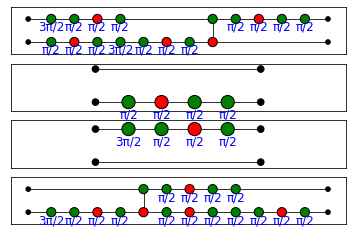

In [8]:
#qasm = qc.decompose().qasm()
pyzx.draw_many(circ_list, whichpyzx)

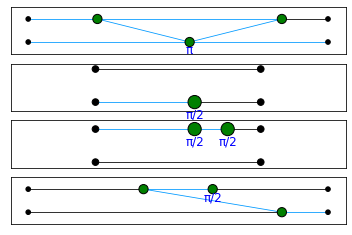

In [9]:
graph_list = [circ_list[w].to_graph() for w in whichpyzx]
[pyzx.full_reduce(g) for g in graph_list]
pyzx.draw_many(graph_list, range(len(whichpyzx)))

In [10]:
pyzx_circ_list = [pyzx.extract.streaming_extract(g) for g in graph_list]

for i in range(len(pyzx_circ_list)):
    prev = pyzx_circ_list[i]
    next = pyzx.extract.streaming_extract(graph_list[i])
    while prev.gates != next.gates:
        for j in range(len(next.gates))[::-1]:
            pyzx_circ_list[i].add_gate_to_front(next.gates[j])
        prev = next
        next = pyzx.extract.streaming_extract(graph_list[i])

pyzx_circ_list = [pyzx.optimize.basic_optimization(new_c.to_basic_gates()) for new_c in pyzx_circ_list]

pyzx_qasm = [new_c.to_basic_gates().to_qasm() for new_c in pyzx_circ_list]

passedAll = True
for i in range(len(pyzx_circ_list)):
    try:
        assert(pyzx.compare_tensors(pyzx_circ_list[i], circ_list[whichpyzx[i]]))
    except AssertionError:
        print(i)
        print(circ_list[whichpyzx[i]].__dict__)
        print(pyzx_circ_list[i].__dict__)
        passedAll = False
assert(passedAll)

0
{'qubits': 2, 'gates': [ZPhase(0,phase=-1/2), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2), ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), ZPhase(1,phase=-1/2), ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), CNOT(0,1), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2), ZPhase(0,phase=1/2)], 'name': ''}
{'qubits': 2, 'gates': [HAD(0), HAD(1), CZ(0,1), CNOT(1,0), HAD(1), HAD(0), NOT(1)], 'name': ''}
1
{'qubits': 2, 'gates': [ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), ZPhase(1,phase=1/2)], 'name': ''}
{'qubits': 2, 'gates': [HAD(1), ZPhase(1,phase=1/2)], 'name': ''}
2
{'qubits': 2, 'gates': [ZPhase(0,phase=-1/2), ZPhase(0,phase=21/2), XPhase(0,phase=1/2), ZPhase(0,phase=21/2)], 'name': ''}
{'qubits': 2, 'gates': [ZPhase(0,phase=3/2), HAD(0)], 'name': ''}
3
{'qubits': 2, 'gates': [ZPhase(1,phase=-1/2), ZPhase(1,phase=21/2), XPhase(1,phase=1/2), ZPhase(1,phase=21/2), CNOT(0,1), ZPhase(0,phase=21/2),

AssertionError: 

In [11]:
pyzx_qasm = ["\n".join(['' if line.startswith("qreg") else line for line in circ.splitlines()[2:]]) for circ in pyzx_qasm]

for new_qasm in pyzx_qasm:
    [print(line) for line in new_qasm.splitlines()]
    print()


h q[0];
h q[1];
cz q[0], q[1];
cx q[1], q[0];
h q[1];
h q[0];
x q[1];


h q[1];
rz(0.5*pi) q[1];


rz(1.5*pi) q[0];
h q[0];


cz q[0], q[1];
h q[1];
h q[0];
rz(0.5*pi) q[0];



In [12]:
#now we need to map registers and glue all the pieces back together
for i in range(len(pyzx_qasm)):
    circ_list[whichpyzx[i]] = pyzx_qasm[i]
#print(circ_list)
## join the
qasm_string = 'OPENQASM 2.0;\ninclude "qelib1.inc";\n'+"\n".join(circ_list)
qasm_string = qasm_string.replace('q[', 'qr[')
print(qasm_string)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[2];
creg cr[2];

h qr[0];
h qr[1];
cz qr[0], qr[1];
cx qr[1], qr[0];
h qr[1];
h qr[0];
x qr[1];
u3(pi,pi/2,pi/2) qr[0];

h qr[1];
rz(0.5*pi) qr[1];
u3(pi,pi/2,pi/2) qr[1];
barrier qr[0],qr[1];
u3(pi,pi/2,pi/2) qr[0];

rz(1.5*pi) qr[0];
h qr[0];
u3(pi,pi/2,pi/2) qr[1];

cz qr[0], qr[1];
h qr[1];
h qr[0];
rz(0.5*pi) qr[0];
measure qr[0] -> cr[0];
measure qr[1] -> cr[1];


In [13]:
# pqsl = [line + "\n" for line in pyzx_qasm] #took out .splitlines()
# qsl = [line + "\n" for line in qasm.splitlines()]
# # print(pqsl)
# # print(qsl)
# new_qasm = '\n'.join(qsl[0:4]) + ''.join(pqsl[3:]) + ''.join(qsl[-2:])
# new_qasm = new_qasm.replace('q[', 'qr[')
# print(new_qasm)

In [14]:
new_qc = qc.from_qasm_str(qasm_string)
print(new_qc)

         ┌───┐   ┌───┐┌───┐┌──────────────────────┐                   »
qr_0: |0>┤ H ├─■─┤ X ├┤ H ├┤ U3(pi,0.5*pi,0.5*pi) ├───────────────────»
         ├───┤ │ └─┬─┘├───┤└────────┬───┬─────────┘┌───┐┌────────────┐»
qr_1: |0>┤ H ├─■───■──┤ H ├─────────┤ X ├──────────┤ H ├┤ Rz(0.5*pi) ├»
         └───┘        └───┘         └───┘          └───┘└────────────┘»
 cr_0: 0 ═════════════════════════════════════════════════════════════»
                                                                      »
 cr_1: 0 ═════════════════════════════════════════════════════════════»
                                                                      »
«                               ░ ┌──────────────────────┐┌────────────┐┌───┐»
«qr_0: ─────────────────────────░─┤ U3(pi,0.5*pi,0.5*pi) ├┤ Rz(1.5*pi) ├┤ H ├»
«      ┌──────────────────────┐ ░ ├──────────────────────┤└────────────┘└───┘»
«qr_1: ┤ U3(pi,0.5*pi,0.5*pi) ├─░─┤ U3(pi,0.5*pi,0.5*pi) ├───────────────────»
«      └──────────────────────┘ ░ └─

In [15]:
print(qc)

         ┌─────────────┐  ┌──────────┐                  ┌──────────┐»
qr_0: |0>┤ U1(-0.5*pi) ├──┤ U2(0,pi) ├───────────────■──┤ U2(0,pi) ├»
         └─┬──────────┬┘┌─┴──────────┴┐┌──────────┐┌─┴─┐├──────────┤»
qr_1: |0>──┤ U2(0,pi) ├─┤ U1(-0.5*pi) ├┤ U2(0,pi) ├┤ X ├┤ U2(0,pi) ├»
           └──────────┘ └─────────────┘└──────────┘└───┘└──────────┘»
 cr_0: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
 cr_1: 0 ═══════════════════════════════════════════════════════════»
                                                                    »
«      ┌────────────┐┌──────────────────────┐ ░ ┌──────────────────────┐»
«qr_0: ┤ U1(0.5*pi) ├┤ U3(pi,0.5*pi,0.5*pi) ├─░─┤ U3(pi,0.5*pi,0.5*pi) ├»
«      ├────────────┤├──────────────────────┤ ░ ├──────────────────────┤»
«qr_1: ┤ U1(0.5*pi) ├┤ U3(pi,0.5*pi,0.5*pi) ├─░─┤ U3(pi,0.5*pi,0.5*pi) ├»
«      └────────────┘└──────────────────────┘ ░ └──────────────────────┘»


In [16]:
import qiskit
from qiskit.providers.basicaer import QasmSimulatorPy
c1 = qiskit.execute(qc, QasmSimulatorPy()).result().get_counts()
c2 = qiskit.execute(new_qc, QasmSimulatorPy()).result().get_counts()

In [17]:
c1

{'00': 1024}

In [18]:
c2

{'00': 1024}

In [19]:
assert(c1 == c2)

In [20]:
qc.depth()

15

In [21]:
qc.size()

26

In [22]:
new_qc.depth()

15

In [23]:
new_qc.size()

21

In [24]:
new_new_qc = qiskit.transpile(qc, basis_gates=['u3', 'cx'], optimization_level=2)

In [25]:
print(new_new_qc)

              ┌────────────┐         ┌───────────────────┐ ░ »
qr_0: |0>─────┤ U2(0,pi/2) ├──────■──┤ U3(pi/2,pi/2,2pi) ├─░─»
         ┌────┴────────────┴───┐┌─┴─┐├───────────────────┤ ░ »
qr_1: |0>┤ U3(pi/2,pi/2,3pi/2) ├┤ X ├┤ U3(pi/2,pi/2,2pi) ├─░─»
         └─────────────────────┘└───┘└───────────────────┘ ░ »
 cr_0: 0 ════════════════════════════════════════════════════»
                                                             »
 cr_1: 0 ════════════════════════════════════════════════════»
                                                             »
«      ┌──────────────────┐       ┌──────────────────┐ ┌─┐   
«qr_0: ┤ U3(pi/2,pi,pi/2) ├──■────┤ U3(pi/2,pi/2,pi) ├─┤M├───
«      ├──────────────────┤┌─┴─┐┌─┴──────────────────┴┐└╥┘┌─┐
«qr_1: ┤ U3(pi/2,pi,pi/2) ├┤ X ├┤ U3(pi/2,-pi/2,pi/2) ├─╫─┤M├
«      └──────────────────┘└───┘└─────────────────────┘ ║ └╥┘
«cr_0: ═════════════════════════════════════════════════╩══╬═
«                                                          ║ 

In [26]:
new_new_qc.depth()

7

In [27]:
new_new_qc.size()

12

In [28]:
doubly_qc = qiskit.transpile(new_qc, basis_gates=['u3', 'cx'], optimization_level=2)
print(doubly_qc)

         ┌──────────┐                 ┌───┐   ┌────────────┐   ░ »
qr_0: |0>┤ U2(0,pi) ├──■──────────────┤ X ├───┤ U2(pi,2pi) ├───░─»
         └──────────┘┌─┴─┐┌──────────┐└─┬─┘┌──┴────────────┴─┐ ░ »
qr_1: |0>────────────┤ X ├┤ U2(0,pi) ├──■──┤ U3(pi,pi/2,2pi) ├─░─»
                     └───┘└──────────┘     └─────────────────┘ ░ »
 cr_0: 0 ════════════════════════════════════════════════════════»
                                                                 »
 cr_1: 0 ════════════════════════════════════════════════════════»
                                                                 »
«      ┌──────────────────┐     ┌──────────────────┐┌─┐
«qr_0: ┤ U3(pi/2,pi,pi/2) ├──■──┤ U3(pi/2,pi/2,pi) ├┤M├
«      └┬────────────────┬┘┌─┴─┐└───────┬─┬────────┘└╥┘
«qr_1: ─┤ U3(pi/2,-pi,0) ├─┤ X ├────────┤M├──────────╫─
«       └────────────────┘ └───┘        └╥┘          ║ 
«cr_0: ══════════════════════════════════╬═══════════╩═
«                                        ║             
«cr_1

In [29]:
doubly_qc.depth()

9

In [30]:
doubly_qc.size()

12

In [31]:
c3 = qiskit.execute(new_new_qc, QasmSimulatorPy()).result().get_counts()
c4 = qiskit.execute(doubly_qc, QasmSimulatorPy()).result().get_counts()
c3

{'00': 1024}

In [32]:
c4

{'00': 1024}